In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
faces_all = fetch_olivetti_faces()

In [3]:
X = faces_all.data
y = faces_all.target

In [4]:
print(X.shape)
print(y)

# X는 40명당 10장의 데이터를 가지고 있으며, 4096의 디멘션을 가짐. (64 * 64)

(400, 4096)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32

In [5]:
# 각 픽셀의 강도를 저장한 벡터
print(X[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


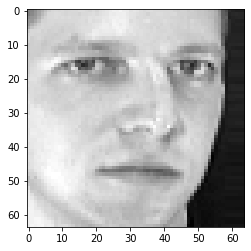

In [6]:
# 영상은 1차원 데이터가 아니기 때문에 에러 발생
# 데이터를 학습시키기 위해서는 1차원이어야 하기 때문에 이런 형식으로 제공한것!
# 2차원 배열로 reshape하여 확인해보기
plt.imshow(X[1].reshape(64, 64), cmap="gray")

In [7]:
# train_test_split: 데이터를 학습용과 테스트용으로 분할해주는 유틸리티
# 10장이 있으면 7장은 학습용, 3장은 테스트용으로 사용하겠다!
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

# 각 데이터 셋이 잘 분리되었다
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(280, 4096)
(120, 4096)
(280,)
(120,)


In [8]:
# 로지스틱 회귀로 성능 얼마나 나오는지 확인해보기

# 훈련용 데이터로 학습 진행
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# 학습에 사용하지 않았던 데이터로 성능 확인
log_reg.predict(X_test)

array([34, 29, 15, 25, 21, 11, 36,  7, 16,  5, 25,  8, 25, 20, 13, 28,  4,
       33, 38, 36, 31,  7, 27, 19, 39, 20, 25, 14, 30,  3, 22,  3,  2, 37,
        9, 14, 39,  8, 17, 18, 25,  5,  5, 11,  3,  9, 31,  4, 26, 10, 14,
       34, 34,  4, 10, 22, 13,  0, 11, 31, 37, 23,  7, 28,  7, 39, 38, 23,
       32, 12, 29, 32, 13, 10,  9, 15, 19,  5,  3, 36,  4,  7,  3, 29, 12,
        1,  5,  2,  6, 29,  5, 26, 21,  1, 35, 20, 17, 39,  4, 38,  6, 24,
       13, 23, 21, 24, 23, 38, 24,  0,  6, 12, 11, 39, 39, 20, 18, 35, 26,
       36])

In [10]:
log_reg.predict(X_test) == Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [11]:
# (처음부터 다시 실행해볼 경우) 실행할때마다 성능이 달라지는 것은 훈련용 데이터 셋이 실행시마다 바뀌기 때문이다
# 동일한 알고리즘으로 동일한 데이터 학습하면 동일한 성능이 나온다
np.mean(log_reg.predict(X_test) == Y_test)

0.8416666666666667

In [12]:
# 훈련용 데이터를 줄이면 성능이 줄어든다
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
log_reg.fit(X_train, Y_train)
np.mean(log_reg.predict(X_test) == Y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.91

In [13]:
# 성능에 영향을 미치지 않는 의미 없는 차원을 제거
# 비지도 학습으로 차원을 줄여보자

# PCA결과에서 베리언스가 작은 축들을 50개정도로 줄이겠다
pca = PCA(n_components=50)  # 4096 -> 50  4096개의 축 중에서 가장 의미있는 50개만 가져오기로 하자

# 이건 에러가 나는데, 201의 베리언스는 거의 0에 가깝기 때문
# 실제 데이터가 4096의 축을 가지고 있더라도 통계학적으로는 의미가 없는 것으로 봄
# 그래서 201번째 축은 계산할 수가 없어서 에러남. 200번째까지는 괜찮음
# pca = PCA(n_components = 201)

pca.fit(X_train)    # 축을 찾아줘! y가 없음. 비지도 학습
print(X_train.shape)

lowX = pca.transform(X_train)  # 찾은 축을 기준으로 X_train에서 데이터 가져오기
print(lowX.shape)

(200, 4096)
(200, 50)


In [14]:
# 위에서 차원을 줄인 데이터를 가지고 학습시켜보기
# 학습 속도가 확연히 줄어듦!
log_reg.fit(lowX, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# 이대로 확인해보려고 하면 에러 남.
# 확인용 데이터도 학습 데이터에 맞게 차원 줄여줘야함
# 근데 X_test에 PCA 적용하려고 하면 안됨! 잘못된 방법
# 확인용 데이터 기준 축과 학습 데이터 기준 축은 다름! (데이터 분포가 달라서)
log_reg.predict(X_test)

ValueError: X has 4096 features per sample; expecting 50

In [16]:
# 이렇게 해줘야 함. 어떤 알고리즘이던지 기준점을 변경하면 안됨
# 학습된 축을 기준으로 정보를 뽑아오는것
lowX_test = pca.transform(X_test)
log_reg.predict(lowX_test)

array([31,  5,  8, 38, 35, 39, 17,  7, 39, 35, 20, 34, 15, 34, 27, 16,  0,
       32,  6, 39, 39, 25, 27,  8, 35, 11, 23, 31, 23, 25, 19, 21, 26, 10,
       28,  8,  7, 16,  9, 20,  0, 17,  9, 31, 20, 27, 16, 24, 32,  3, 31,
       35, 26,  1, 23, 22, 34,  2, 18, 29, 29, 20, 28, 24, 36, 24, 30, 17,
       16, 20, 18, 24, 27, 16, 25, 15, 23, 38,  4, 28, 10, 26, 38, 13, 24,
       37,  6,  5, 13,  8,  3,  6, 14, 29,  0, 18, 30, 17, 28,  5, 18,  1,
        7,  5, 30, 17,  6, 19, 29,  2, 23, 27, 12, 15, 17, 39, 38, 33, 37,
       25, 35, 22, 12, 10, 22, 37, 26,  8,  4, 14, 32,  3, 33, 12,  4,  3,
       13, 14, 14, 12, 37, 24,  0,  7, 13,  5, 22,  6, 26, 32, 26, 15, 33,
       11, 24, 10, 15,  6,  5, 13,  3,  3, 29, 21,  4,  9,  3, 18, 27, 28,
        4, 22, 38, 32,  5, 28, 31, 19,  1, 19, 11, 28, 33, 28, 14, 25, 33,
       19, 39, 30,  0, 21, 25, 37, 38, 11, 25, 12, 32, 37])

In [17]:
# 50 차원으로 줄어들었는데 성능에는 크게 차이가 없네..?
# 그만큼 불필요한 정보가 굉장히 많다는 뜻~
np.mean(log_reg.predict(lowX_test) == Y_test)

0.915

In [18]:
# 30개 축만 해볼까?
pca = PCA(n_components=30)
pca.fit(X_train)

lowX = pca.transform(X_train)
log_reg.fit(lowX, Y_train)

lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.905

In [19]:
# 5개 축만 해볼까?
# 너무 의미있는 값까지 제거해버리면 성능이 줄어든다
pca = PCA(n_components=5)
pca.fit(X_train)

lowX = pca.transform(X_train)
log_reg.fit(lowX, Y_train)

lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.54

In [20]:
# 베리언스 출력해보기
# 첫번째 축의 베리언스는 엄청 크지만 뒤로 갈수록 베리언스가 작아진다
pca = PCA(n_components=200)
pca.fit(X_train)

lowX = pca.transform(X_train)
log_reg.fit(lowX, Y_train)

lowX_test = pca.transform(X_test)

print(pca.singular_values_)

[6.0729527e+01 4.7353821e+01 3.7183174e+01 2.9607666e+01 2.3783308e+01
 2.2641340e+01 2.0095930e+01 1.8627106e+01 1.7774485e+01 1.7328596e+01
 1.5942498e+01 1.5561339e+01 1.4846940e+01 1.4551707e+01 1.3542734e+01
 1.2868665e+01 1.2666019e+01 1.1822865e+01 1.1448282e+01 1.0798293e+01
 1.0279393e+01 1.0158926e+01 9.7356758e+00 9.6114035e+00 9.4984159e+00
 9.2603693e+00 9.1923437e+00 8.9824333e+00 8.8445930e+00 8.6116581e+00
 8.1906366e+00 8.1019878e+00 7.8336844e+00 7.6548200e+00 7.5454555e+00
 7.3370934e+00 7.1805925e+00 7.1271195e+00 6.9599261e+00 6.8656716e+00
 6.7939792e+00 6.6030416e+00 6.5344043e+00 6.5029802e+00 6.4569821e+00
 6.4191790e+00 6.1724329e+00 6.1451988e+00 6.0719342e+00 5.9851704e+00
 5.8921137e+00 5.7779822e+00 5.6443887e+00 5.6146646e+00 5.5782413e+00
 5.4929953e+00 5.4218497e+00 5.3562226e+00 5.2729869e+00 5.2331147e+00
 5.1545076e+00 5.1196523e+00 5.0854192e+00 5.0189514e+00 4.9258866e+00
 4.8917360e+00 4.8239970e+00 4.7236223e+00 4.6891403e+00 4.6656599e+00
 4.644

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


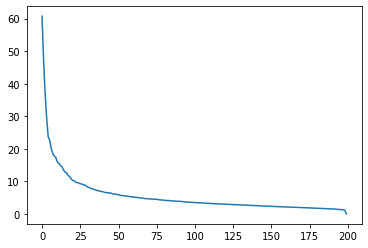

In [21]:
# 베리언스가 끝으로 갈수록 작아짐. linear하게 줄어드는것이 x
plt.plot(pca.singular_values_)

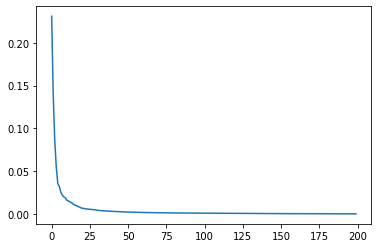

In [22]:
# 베리언스의 비율을 가지고 그래프를 그려보자
# 전체 베리언스에서 이 베리언스가 차지하는 비율이 얼마인지
plt.plot(pca.explained_variance_ratio_)

# 첫번째 축은 전체 데이터의 25%를 차지,
# 150번째 축의 비율은 0에 가까움

# 만약 첫번째 축만 사용하겠다라고 한다면, 전체 중 25%의 데이터만 쓰고 나머지는 버리겠다는 의미

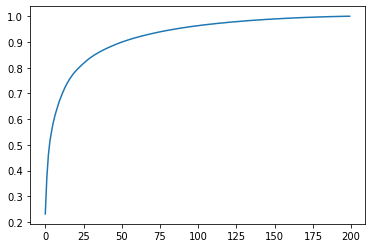

In [23]:
# 누적 그래프로 보기 (np.cumsum == 누적)
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

# 축을 50개 가져다 쓰면 전체 데이터 중 90% 정도를 표현하는 것
# 이 그래프를 사용하면 객관적으로 어떤 기준을 가지고 축을 선택했는지 설명할 수 있다 

In [24]:
# 요즘은 pca로 데이터 줄여서 학습시키지는 않고,
# 고차원의 데이터를 2차원 혹은 3차원으로 줄여서 그래프 그릴때 사용함

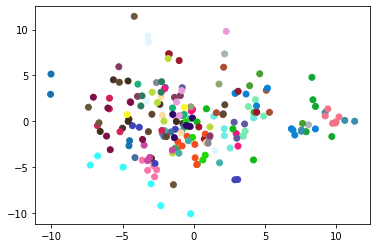

In [25]:
# 각각의 사람을 다른 색깔로 표시해서 그래프로 그려보기
# 대략적으로 데이터 분포를 확인할 수 있음
col = np.random.rand(40, 3)
colors = [col[i] for i in Y_train]
plt.scatter(lowX[:,0], lowX[:,1], c = colors)

# K-Means

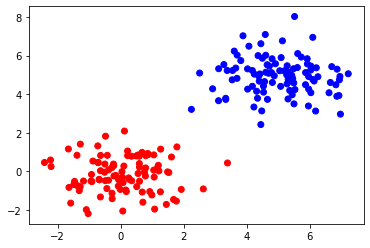

In [26]:
# day2 코드
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(5, 1, size=[samples,2])  # b == 1

x_data = np.vstack([x_data0, x_data1])
y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [27]:
# 학습 시기키
model = KMeans(n_clusters=2, init="random", max_iter=1).fit(x_data)

# 클러스팅을 어떻게 했지?
# 각 클러스터의 센터 찍어보기
print(model.cluster_centers_)

# 학습 할때마다 결과가 달라짐 (처음에 랜덤하게 영역 중심을 선택해서 달라지기 때문)

[[ 5.00799794  4.91996879]
 [ 0.07127064 -0.1488977 ]]


In [28]:
# 각 점이 어느 그룹에 속하는지 예측 
# 모델링 하면서 분류한 내용 (스스로 분류해보면서 라벨 붙여준거)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


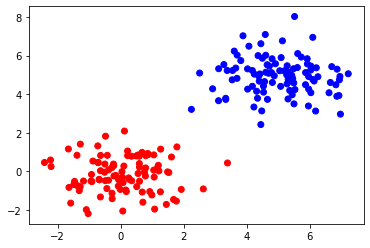

In [29]:
# 클러스터링만 가지고도 분류할 수 있는 쉬운 데이터
d = ['blue', 'red']
colors = [d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], c=colors)

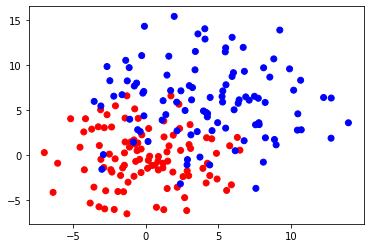

In [30]:
# 겹치는 경우에도 잘 분류하는지 보자!
samples = 100

x_data0 = np.random.normal(0, 3, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(5, 4, size=[samples,2])  # b == 1

x_data = np.vstack([x_data0, x_data1])
y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [31]:
# 학습 시기키
model = KMeans(n_clusters=2, init="random", max_iter=1).fit(x_data)

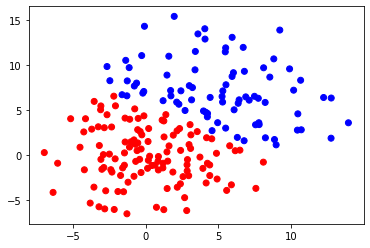

In [32]:
# 분포가 거의 섞여있을때는 K-Means가 잘 동작하지 않음
d = ['blue', 'red']
colors = [d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], c=colors)

In [33]:
# 위의 사람 이미지 데이터를 가지고 클러스터링 해보자
model = KMeans(n_clusters=40, init="random", max_iter=6).fit(X)
print(model.labels_)
print(y)

# 어느정도는 분류하지만 잘 분류하지 못함 
#(같은 사람인데 어느건 다른 라벨 붙이고 어느건 잘 붙이고..)
# 같은 그룹에 잘 묶은 건 그만큼 거리가 가깝다는 의미

# 연속으로 같은 숫자가 10개 잘 나온 애들은 인식률을 높이는애
# 다 다른 숫자가 나온 애들은 구별하기 힘든, 같은 사진이 거의 없는, 거리가 먼, 인식률을 저하시키는 애

# K-Means는 그렇게 좋은 알고리즘은 아님
# 데이터가 100만건일때 label을 달기 어려울 때 일단 러프하게 이걸로 달고
# 사람이 확인하면서 세부적으로 분류하거나 할 때 씀

[17 13 17 31 13  5 17  5  5 13 12 12 12 12 12 12 12 12 12 12 27 27 27 34
 34 34 16 31  8  8  7 23  7 29 23 31 29  7 23 23 16 19 28 16 16 16 16 16
 16  0  8  8  0  0  0  0  0  0  0  0 35 35 29 15 35 29 35 35 29 35  9  1
  1 10  1  1 39  1  5 39 30 30 30 30 30 16 16 16 30 28  9  9 10 10 24 24
 24 24 31  1 21 21 21 21 21 21 21 21 21 21 24 30 30 30 30 29 30 24 24 24
 23 23 16 31 29 23 31 31  8 29  8 27 27  8  8 27  8 27 27 27 20 23 20 20
 23 20 23 20 23 23 17 17 17 17 17 17 17 17 17 17 15 15 19 19 15  3  3 15
 15 31 29 29 29 29 29 29 29 29 29 29 26 26 26 21 21 26 21 21 21 26  2  2
  2 28 33 28 33 33 33  2 14 14 14 28 28 28 31 31 28 31 18 18 18 18 18 22
 18 18 18 18 29  8 30 16 30 16 30  8 16 29 17 17  3  3 10  3 17  6  3  3
  8 10  8 23  8 10  8 16  8  8 19 19 27 27 27 34 29 27 30 27  8  8  8  8
  8 26  8  8 27  8 37 37 37 37 37 37 37 37 37  7 22 22 22 34 34 34 34 31
 22 22 28  4 28  4  4  4  4  4  4  4 14 25 25 25 25 14 14 14 14 25 32 26
 26 32 32 32 23 32 32 32 38 38 38 38 38 38 38 38 38

In [34]:
# 

In [35]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [36]:
# 먼저 K-means로 학습해서 성능 보기

In [37]:
# dataset에 pca 적용해보기

# 데이터셋 크기 확인
print(X)

# 축 찾아서 데이터 골라내기
pca = PCA(n_components=2)
pca.fit(X)
low = pca.transform(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

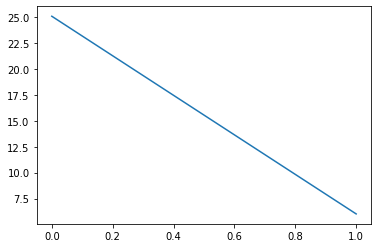

In [38]:
# 베리언스 출력해보기
plt.plot(pca.singular_values_)

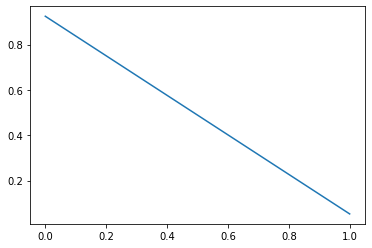

In [39]:
# 베리언스 비율 출력해보기
plt.plot(pca.explained_variance_ratio_)

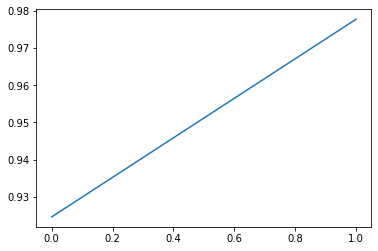

In [40]:
# 베리언스 비율 누적 그래프 그려보기
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

In [41]:
# pca로 차원을 줄인 데이터로 K-Means로 분류해보기
model = KMeans(n_clusters=3, init = "random", max_iter=1).fit(low)

In [42]:
# 학습 결과 보기
model.labels_

# 중간 중간 섞여있는 부분이 오류

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [43]:
# 분류한 데이터 그래프로 그려보기
d = ['red', 'blue', 'green']
colors = [d[i] for i in model.labels_]
print(colors)

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blu

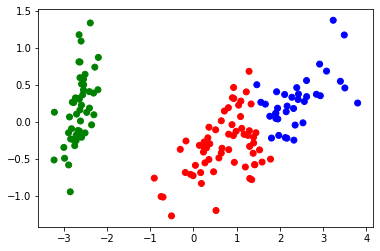

In [44]:
plt.scatter(low[:,0], low[:,1], c=colors)

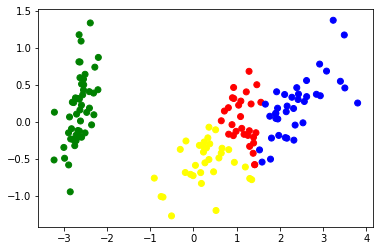

In [45]:
# cluster 변경해보기
model = KMeans(n_clusters=4, init = "random", max_iter=1).fit(low)
d = ['red', 'blue', 'green', 'yellow']
colors = [d[i] for i in model.labels_]
plt.scatter(low[:,0], low[:,1], c=colors)

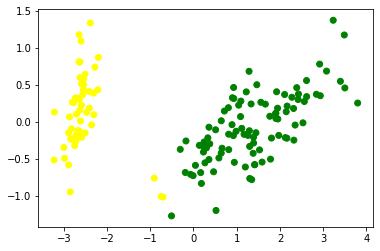

In [46]:
model = KMeans(n_clusters=2, init = "random", max_iter=1).fit(low)
d = ['green', 'yellow']
colors = [d[i] for i in model.labels_]
plt.scatter(low[:,0], low[:,1], c=colors)

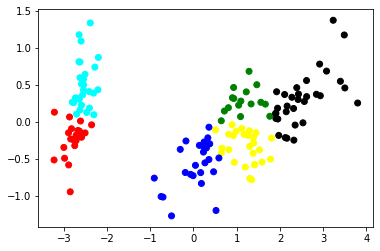

In [47]:
model = KMeans(n_clusters=6, init = "random", max_iter=1).fit(low)
d = ['red', 'blue', 'green', 'yellow', 'black', 'cyan']
colors = [d[i] for i in model.labels_]
plt.scatter(low[:,0], low[:,1], c=colors)

In [48]:
# pca 결과로 축을 버린 (차원을 낮춘) 값이
#원래 좌표 체계에서는 어떤 값을 가졌는지 보려면 inverse_transform하면 됨
print(low.shape)
reconX = pca.inverse_transform(low)
print(reconX.shape)

print(X[0:10])
print(reconX[0:10])  # 똑같진 않지만 거의 복구됨

(150, 2)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[5.08303897 3.51741393 1.40321372 0.21353169]
 [4.7462619  3.15749994 1.46356177 0.24024592]
 [4.70411871 3.1956816  1.30821697 0.17518015]
 [4.6422117  3.05696697 1.46132981 0.23973218]
 [5.07175511 3.52655486 1.36373845 0.19699991]
 [5.50581049 3.79140823 1.67552816 0.32616959]
 [4.76528947 3.23041102 1.35723837 0.19551776]
 [5.00155648 3.39859911 1.47993231 0.2460815 ]
 [4.42052031 2.87903672 1.3855842  0.20882514]
 [4.80273233 3.20016781 1.48805402 0.2503016 ]]


In [49]:
# 이미지에 pca 적용하고 복구해보기
X = faces_all.data
X_train, X_test = train_test_split(X, test_size=0.5)

pca = PCA(n_components=50)
pca.fit(X_train)

lowX = pca.transform(X_train)

In [50]:
recon = pca.inverse_transform(lowX)

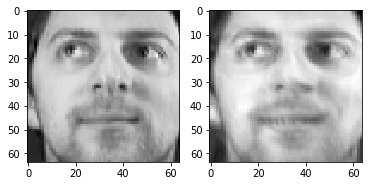

In [51]:
plt.subplot(121)
plt.imshow(X_train[123].reshape(64, 64), cmap='gray')
plt.subplot(122)
plt.imshow(recon[123].reshape(64, 64), cmap='gray')

# 흐리긴 하지만 거의 복구된 모습
# 손실 압축에 보통 이런 방법을 사용

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=2)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)
# 이걸로 그래프 그림

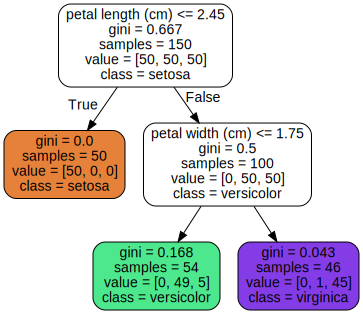

In [55]:
import pydot
# 그래프 그린걸 pydot으로 불러옴
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html   # bin 폴더 path 설정 필요

# 아직 gini계수가 0이 아니다! 아직 분류를 더 해야한다는 의미

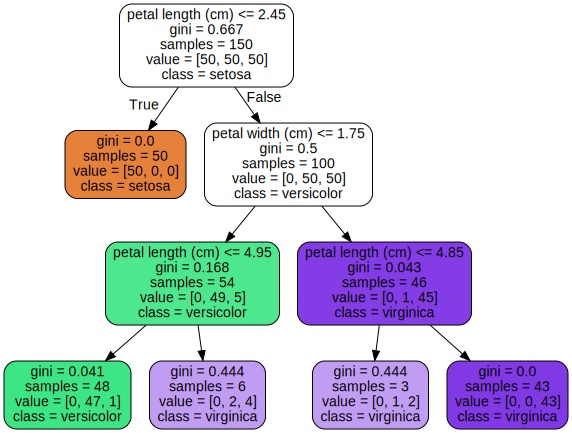

In [56]:
# depth를 3으로 늘려서 확인해보자
tree = DecisionTreeClassifier(max_depth=3)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)

graph = pydot.graph_from_dot_file("iris.dot")[0]

import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


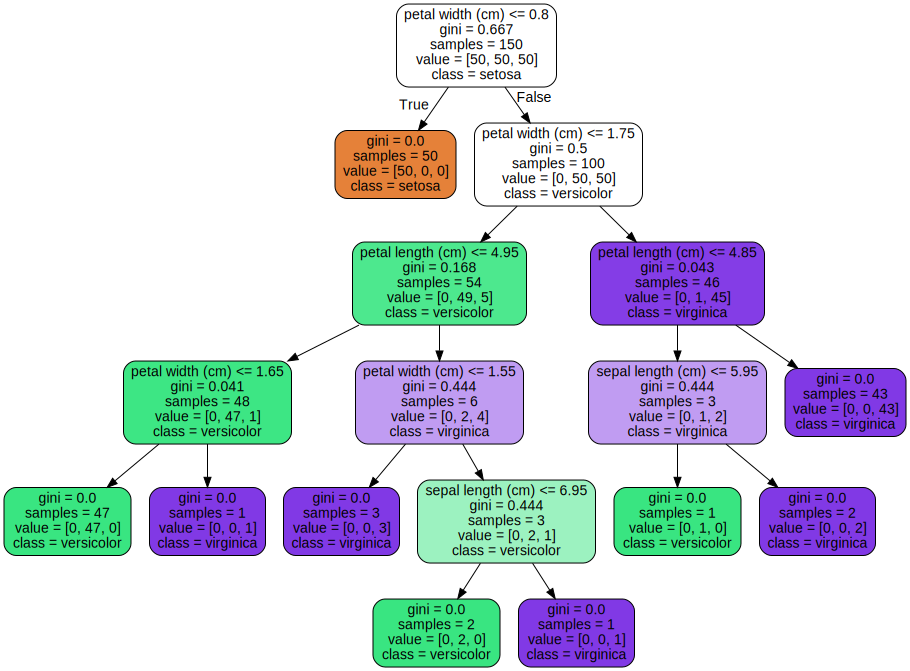

In [57]:
# 아직도 섞여있다 더 늘리자!
# depth를 5로 늘려서 확인해보자
tree = DecisionTreeClassifier(max_depth=5)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)

graph = pydot.graph_from_dot_file("iris.dot")[0]

import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 5로 늘렸더니 완전히 분류가 됐다!

In [75]:
X = faces_all.data
y = faces_all.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

pca = PCA(n_components=50)
pca.fit(X_train)

lowX = pca.transform(X_train)

tree = DecisionTreeClassifier(max_depth=14)
tree.fit(lowX, Y_train)

np.mean(tree.predict(lowX) == Y_train)

# 훈련용 데이터에 적용하면 성능이 좋게 나오지만

0.935

In [74]:
X = faces_all.data
y = faces_all.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

pca = PCA(n_components=50)
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree = DecisionTreeClassifier(max_depth=14)
tree.fit(lowX, Y_train)

np.mean(tree.predict(lowX_test) == Y_test)

# 테스트용 데이터에 적용하면 성능이 좋지 않다

0.375

In [76]:
tree = DecisionTreeClassifier(max_depth=40)
tree.fit(lowX, Y_train)
print(np.mean(tree.predict(lowX) == Y_train))
print(np.mean(tree.predict(lowX_test) == Y_test))

1.0
0.03


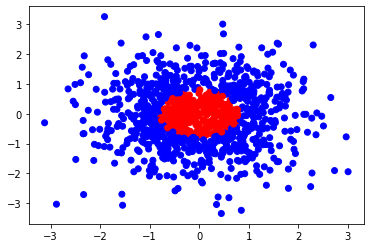

In [79]:
samples = 1000
x_data = np.random.normal(0, 1, size = [samples, 2])
d = np.sqrt([x[0]**2 + x[1]**2 for x in x_data])
y_data = np.array([0 if i < 0.8 else 1 for i in d]).reshape(samples, 1)
colors = ["red" if i == 0 else "blue" for i in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color = colors)

# 비선형 분포

In [90]:
# 어떻게 풀어야할까? 분류 문제이므로 일단 로지스틱 회귀를 이용해 해보자
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
# 인식률
np.mean(log_reg.predict(x_data) == y_data)

0.717

In [92]:
# 간단하게 이 함수 써도 됨
log_reg.score(x_data, y_data)

# 70%가 넘으니까 분류를 잘 하는거 아냐?

0.717

In [93]:
# 아니야!
log_reg.predict(x_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

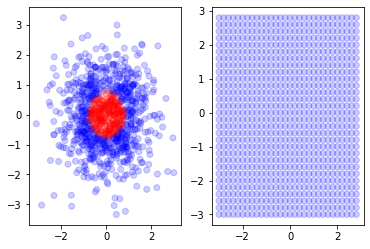

In [94]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = log_reg.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

# 전부 1인걸로 분류해버리뮤ㅠㅠ

In [95]:
# 비선형 문제를 svm으로 풀어보자!
# 엄청 유명했지만 지금은 잘 안쓰는...
from sklearn.svm import SVC
model = SVC(kernel = 'poly', degree = 2).fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


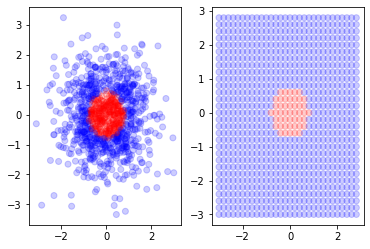

In [96]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

# 오 분류 잘 하네!

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


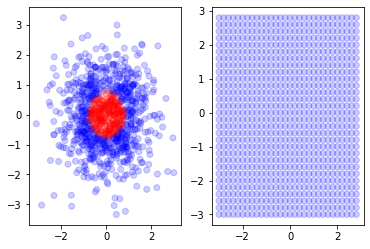

In [97]:
# degree 0으로 하면 제곱을 못해서 분류 못함 (로지스틱 회귀(선형 분류)랑 똑같은 결과 나옴)
model = SVC(kernel = 'poly', degree = 0).fit(x_data, y_data)

plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


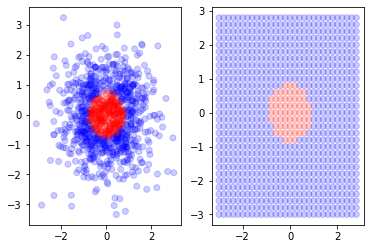

In [98]:
# 데이터가 복잡하면 degree도 높여야함
# 근데 degree가 너무 높으면 오버 피팅 확률이 높음
# 곡선을 최대한 자세히 그리려고 해서..
# 보통 2~3차 차원에서 해결. 5차원이면 오히려 성능 떨어짐
model = SVC(kernel = 'poly', degree = 4).fit(x_data, y_data)

plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

# 4차원까진 괜춘!

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


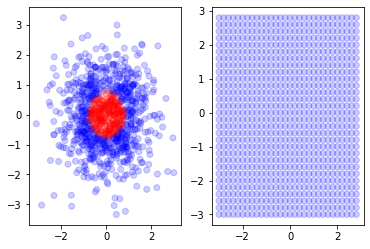

In [99]:
model = SVC(kernel = 'poly', degree = 5).fit(x_data, y_data)

plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

# 5차원은 오히려 안된다

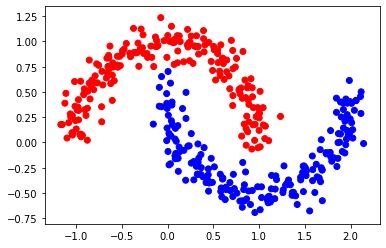

In [100]:
from sklearn.datasets import make_moons
x_data, y_data= make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)


In [101]:
# polynomy architecture를 이용해서 차원을 높이고
# 비선형 데이터를 분류
model = SVC(kernel='poly', degree=2).fit(x_data, y_data) 

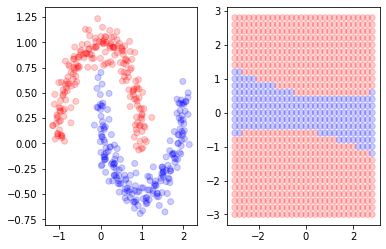

In [102]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

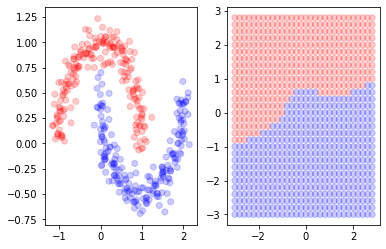

In [113]:
# 오잉? 분류를 잘 못하네..
# degree를 높여도 그래..ㅠㅠ
model = SVC(kernel='poly', degree=5).fit(x_data, y_data) 
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

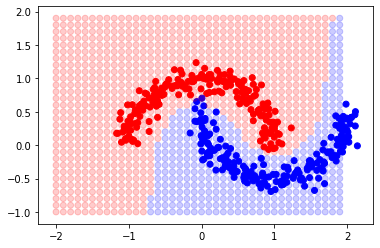

In [115]:
# 커널을 바꿨더니 더 잘 분류한다!
# 어떤 데이터냐에 따라 더 잘 분류하는 커널이 있따
model = SVC(kernel='rbf').fit(x_data, y_data) 

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)
xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [117]:
from sklearn.preprocessing import PolynomialFeatures

# 강제로 차원을 높이는 함수
poly = PolynomialFeatures(degree=2)

# 2차원을 5차원으로 높임
poly.fit([[2, 6]])
print(poly.transform([[2,6]]))  # 1, 2, 6, 2^2, 2*6, 6^2

[[ 1.  2.  6.  4. 12. 36.]]


In [118]:
poly.fit(x_data)
print(x_data.shape)

(400, 2)


In [119]:
X2 = poly.transform(x_data)
print(X2.shape)

(400, 6)


In [120]:
log_reg = LogisticRegression()
log_reg.fit(X2, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

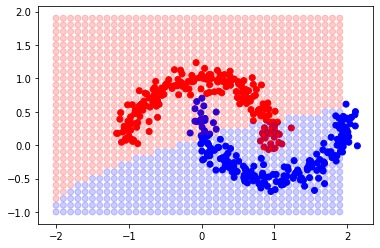

In [124]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)
xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]

grid = np.c_[xx.ravel(), yy.ravel()]
# grid를 바로 집어넣으면 안됨. 차원 확장을 해야함
grid = poly.transform(grid)
p = log_reg.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

# 성능이 좋진 않지만 선형은 아님. 차원을 더 높이면 성능이 좋아질것!

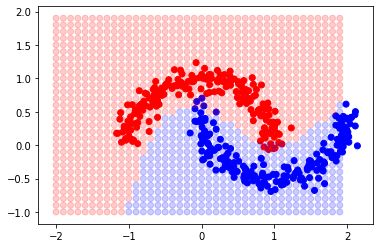

In [139]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2, 6]])
poly.transform([[2, 6]])
poly.fit(x_data)

X2 = poly.transform(x_data)

log_reg.fit(X2, y_data)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)
xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]

grid = np.c_[xx.ravel(), yy.ravel()]
# grid를 바로 집어넣으면 안됨. 차원 확장을 해야함
grid = poly.transform(grid)
p = log_reg.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [138]:
# Polymnominal Feature가 차원 확장 해주는것을 코드로 작성해보면 이렇다!
x = [1, 2]
x2 = [1, x[0], x[1], x[0]**2, x[0]*x[1], x[1]**2]
print(x2)

[1, 1, 2, 1, 2, 4]


In [140]:
import numpy.linalg as lin
W = np.matmul(lin.pinv(X2), y_data)

predict = np.matmul(X2,W) > 0.5

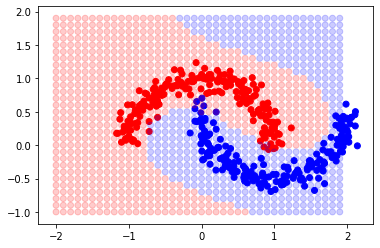

In [141]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)
xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]

grid = np.c_[xx.ravel(), yy.ravel()]
# grid를 바로 집어넣으면 안됨. 차원 확장을 해야함
grid = poly.transform(grid)
p = np.matmul(grid, W) > 0.5

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)